## <center>STATISTICAL MODELING OF OPERATIONAL RISK LOSSES (v 1.0)</center>
### <center>USING PYTHON PROGRAMMING LANGUAGE</center>
Operational Risk Value at Risk Calculation using Poisson Distribution, Inverse Binomial Distribution to generate frequency of risks and Inverse Lognormal Distribution to generate loss severity.
The data for operational risk losses is downloaded from "OpVar" package for R and is used for computation within this notebook.

Prepared by Imir Osmanov.
Date: 03.04.2024

In [65]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [66]:
# Downloading necessary files
# Operational losses type 1
filepath_1 = 'C:/Users/user/Documents/R studio/file1.xlsx'
df_loss_1 = pd.read_excel(filepath_1)
df_loss_1.head()

,Loss,Period,Date
0,1877,1,2016-12-31
1,1807,1,2016-12-30
2,918,1,2016-12-30
3,1480,1,2016-12-29
4,1218,1,2016-12-27


In [67]:
# Downloading necessary files
# Operational losses type 2
filepath_2 = 'C:/Users/user/Documents/R studio/file2.xlsx'
df_loss_2 = pd.read_excel(filepath_2)
df_loss_2.head()

,Loss,Period,Date
0,181,1,2016-12-31
1,610,1,2016-12-23
2,961,1,2016-12-19
3,1312,1,2016-12-19
4,259,1,2016-12-14


In [68]:
# Downloading necessary files
# Operational losses type 3
filepath_3 = 'C:/Users/user/Documents/R studio/file3.xlsx'
df_loss_3 = pd.read_excel(filepath_3)
df_loss_3.head()

,Loss,Period,Date
0,1334,1,2016-12-31
1,1067,1,2016-12-30
2,1068,1,2016-12-29
3,714,1,2016-12-26
4,1590,1,2016-12-26


In [69]:
# Downloading necessary files
# Operational losses type 4
filepath_4 = 'C:/Users/user/Documents/R studio/file4.xlsx'
df_loss_4 = pd.read_excel(filepath_4)
df_loss_4.head()

,Loss,Period,Date
0,650,1,2016-12-31
1,847,1,2016-12-30
2,242,1,2016-12-11
3,513,1,2016-12-09
4,264,1,2016-12-07


# 1. Exploratory Data Analysis

In [70]:
print(f'Shape of df_loss_1 : {df_loss_1.shape}')
print(f'Total number of rows : {df_loss_1.shape[0]}')
print(f'Total number of columns : {df_loss_1.shape[1]}')

Shape of df_loss_1 : (1965, 3)
Total number of rows : 1965
Total number of columns : 3


In [71]:
print(f'Shape of df_loss_2 : {df_loss_2.shape}')
print(f'Total number of rows : {df_loss_2.shape[0]}')
print(f'Total number of columns : {df_loss_2.shape[1]}')

Shape of df_loss_2 : (2025, 3)
Total number of rows : 2025
Total number of columns : 3


In [72]:
print(f'Shape of df_loss_3 : {df_loss_3.shape}')
print(f'Total number of rows : {df_loss_3.shape[0]}')
print(f'Total number of columns : {df_loss_3.shape[1]}')

Shape of df_loss_3 : (1995, 3)
Total number of rows : 1995
Total number of columns : 3


In [73]:
print(f'Shape of df_loss_4 : {df_loss_4.shape}')
print(f'Total number of rows : {df_loss_4.shape[0]}')
print(f'Total number of columns : {df_loss_4.shape[1]}')

Shape of df_loss_4 : (1941, 3)
Total number of rows : 1941
Total number of columns : 3


Checking dataframes

In [75]:
df_loss_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss    1965 non-null   int64         
 1   Period  1965 non-null   int64         
 2   Date    1965 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 46.2 KB


In [76]:
df_loss_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss    2025 non-null   int64         
 1   Period  2025 non-null   int64         
 2   Date    2025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 47.6 KB


In [77]:
df_loss_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss    1995 non-null   int64         
 1   Period  1995 non-null   int64         
 2   Date    1995 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 46.9 KB


In [78]:
df_loss_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss    1941 non-null   int64         
 1   Period  1941 non-null   int64         
 2   Date    1941 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 45.6 KB


# Observations:
Numeric features have int64 dtype:
1. Loss
2. Period

Date feature has datetime64[ns] dtype.

# 2. Checking for null and duplicate values

In [79]:
df_loss_1.isna().sum()

Loss      0
Period    0
Date      0
dtype: int64

In [80]:
df_loss_1.duplicated().sum()

0

In [81]:
df_loss_2.isna().sum()

Loss      0
Period    0
Date      0
dtype: int64

In [82]:
df_loss_2.duplicated().sum()

0

In [83]:
df_loss_3.isna().sum()

Loss      0
Period    0
Date      0
dtype: int64

In [84]:
df_loss_3.duplicated().sum()

0

In [85]:
df_loss_4.isna().sum()

Loss      0
Period    0
Date      0
dtype: int64

In [86]:
df_loss_4.duplicated().sum()

0

In [87]:
display(df_loss_1.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Loss,1965.0,1016.951145,881.787605,5.0,359.0,760.0,1428.0,6382.0
Period,1965.0,20.513995,11.514377,1.0,10.0,21.0,30.0,40.0


In [88]:
display(df_loss_2.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Loss,2025.0,1139.487901,1000.868135,3.0,388.0,850.0,1603.0,6213.0
Period,2025.0,20.395062,11.628088,1.0,10.0,20.0,31.0,40.0


In [89]:
display(df_loss_3.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Loss,1995.0,1051.507268,940.738532,48.0,464.0,788.0,1325.0,12092.0
Period,1995.0,20.231579,11.871702,1.0,10.0,20.0,31.0,40.0


In [90]:
display(df_loss_4.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Loss,1941.0,969.105100,781.152228,201.0,411.0,717.0,1255.0,6215.0
Period,1941.0,20.519835,11.498106,1.0,11.0,20.0,30.0,40.0


# Observations
1. There are no null and duplicated values in all dataframes (Operational Risk Type 1, Type 2, Type 3 and Type 4).
2. For all dataframes the mean and median have significant difference that shows the Operational Risk Loss data is skewed. 

# 3. Numerical Features Data Analysis

1. Operational Risk Loss Type 1

Text(0.5, 1.0, 'Operational loss type 1')

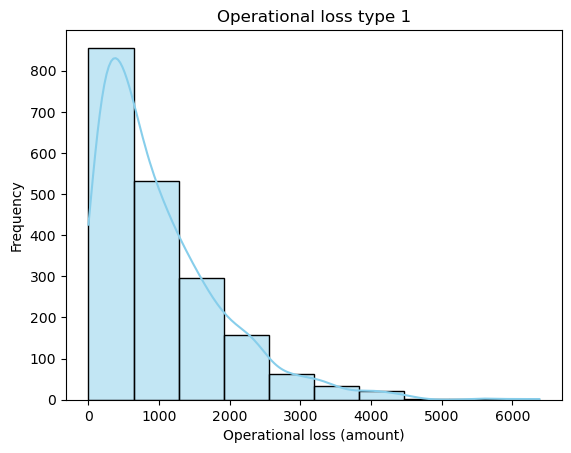

In [91]:
# Histogram of distribution of Operational Risk Losses type 1
sns.histplot(df_loss_1['Loss'], bins = 10, color = 'skyblue', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 1')

Text(0.5, 1.0, 'Boxplot Operational Loss Type 1')

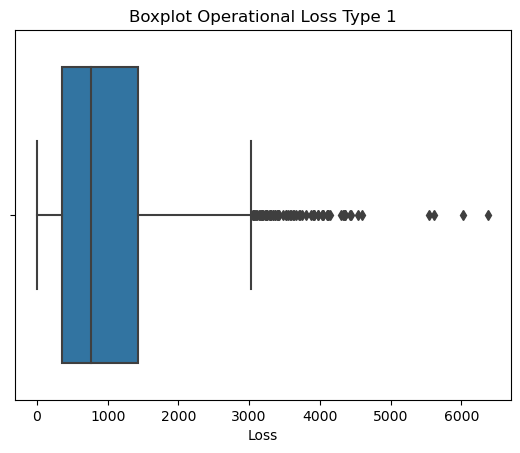

In [92]:
# Boxplot of distribution of Operational Risk Losses type 1
sns.boxplot(x = 'Loss', data = df_loss_1, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss Type 1')

2. Operational Risk Loss Type 2

Text(0.5, 1.0, 'Operational loss type 2')

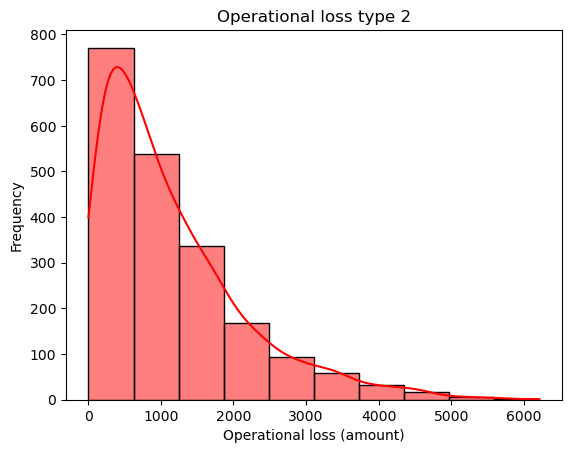

In [93]:
# Histogram of distribution of Operational Risk Losses type 2
sns.histplot(df_loss_2['Loss'], bins = 10, color = 'red', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 2')

Text(0.5, 1.0, 'Boxplot Operational Loss Type 2')

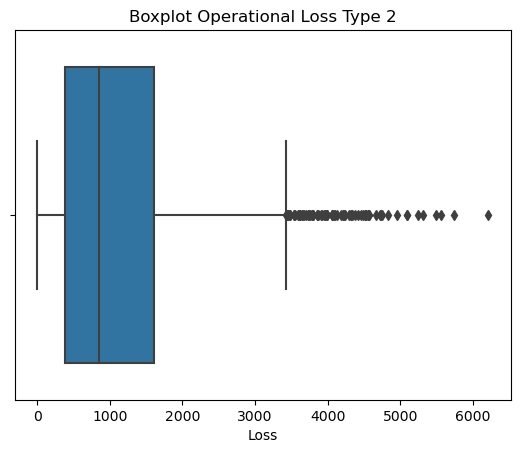

In [94]:
# Boxplot of distribution of Operational Risk Losses type 2
sns.boxplot(x = 'Loss', data = df_loss_2, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss Type 2')

3. Operational Risk Loss Type 3

Text(0.5, 1.0, 'Operational loss type 3')

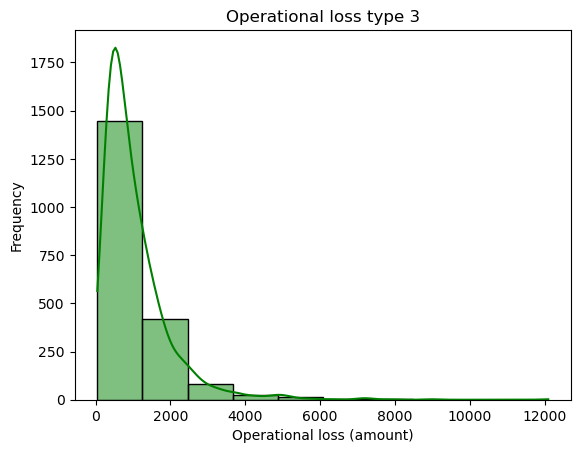

In [95]:
# Histogram of distribution of Operational Risk Losses type 3
sns.histplot(df_loss_3['Loss'], bins = 10, color = 'green', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 3')

Text(0.5, 1.0, 'Boxplot Operational Loss Type 3')

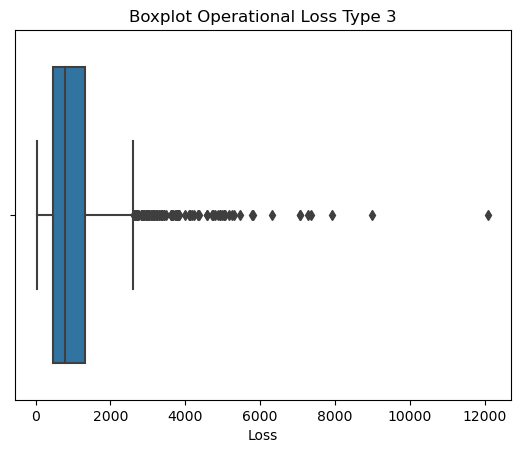

In [96]:
# Boxplot of distribution of Operational Risk Losses type 3
sns.boxplot(x = 'Loss', data = df_loss_3, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss Type 3')

4. Operational Risk Loss Type 4

Text(0.5, 1.0, 'Operational loss type 4')

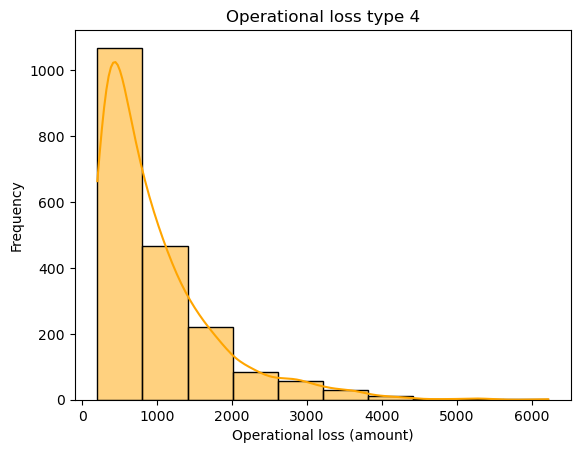

In [97]:
# Histogram of distribution of Operational Risk Losses type 4
sns.histplot(df_loss_4['Loss'], bins = 10, color = 'orange', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 4')

Text(0.5, 1.0, 'Boxplot Operational Loss Type 4')

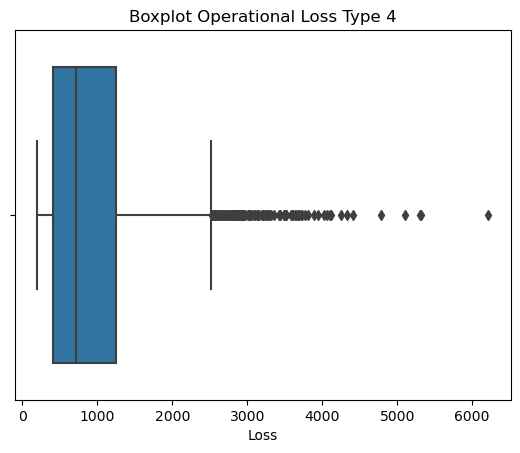

In [98]:
# Boxplot of distribution of Operational Risk Losses type 4
sns.boxplot(x = 'Loss', data = df_loss_4, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss Type 4')

# Observations
Operational Risk Losses of Type 1, Type 2, Type 3 and Type 4 are skewed to the left of distribution which tells that data has more Operational Risk Losses with small amount, but having values at the right of the distributions shows presence of outliers which is confirmed by Boxplots of each distribution.

# 4. Data Preprocessing

# Number/frequency of Operational Risk Losses

1. Operational Risk Loss Type 1

In [99]:
# Calculating number/frequency of operational losses per month for type 1
freq_monthly_type1 = df_loss_1.groupby(df_loss_1['Date'].dt.to_period('M')).size()
freq_monthly_type1

Date
2007-01    14
2007-02    20
2007-03    17
2007-04    15
2007-05    17
           ..
2016-08    16
2016-09    16
2016-10    18
2016-11    14
2016-12    13
Freq: M, Length: 120, dtype: int64

In [100]:
# Converting to dataframe
freq_monthly_type1 = pd.DataFrame(freq_monthly_type1)
freq_monthly_type1.head()

,0
Date,
2007-01,14
2007-02,20
2007-03,17
2007-04,15
2007-05,17


In [101]:
# Reseting index
freq_monthly_type1.reset_index(inplace = True)
freq_monthly_type1

,Date,0
0,2007-01,14
1,2007-02,20
2,2007-03,17
3,2007-04,15
4,2007-05,17
...,...,...
115,2016-08,16
116,2016-09,16
117,2016-10,18
118,2016-11,14


In [102]:
# Renaming column names
freq_monthly_type1 = freq_monthly_type1.rename(columns = {0: 'Frequency'})
freq_monthly_type1.head(3)

,Date,Frequency
0,2007-01,14
1,2007-02,20
2,2007-03,17


2. Operational Risk Loss Type 2

In [103]:
# Calculating number/frequency of operational losses per month for type 2
freq_monthly_type2 = df_loss_2.groupby(df_loss_2['Date'].dt.to_period('M')).size()
freq_monthly_type2

Date
2007-01    15
2007-02    18
2007-03    19
2007-04    16
2007-05    17
           ..
2016-08    24
2016-09    12
2016-10    19
2016-11    23
2016-12     9
Freq: M, Length: 120, dtype: int64

In [104]:
# Converting to dataframe
freq_monthly_type2 = pd.DataFrame(freq_monthly_type2)
freq_monthly_type2.head()

,0
Date,
2007-01,15
2007-02,18
2007-03,19
2007-04,16
2007-05,17


In [105]:
# Reseting index
freq_monthly_type2.reset_index(inplace = True)
freq_monthly_type2

,Date,0
0,2007-01,15
1,2007-02,18
2,2007-03,19
3,2007-04,16
4,2007-05,17
...,...,...
115,2016-08,24
116,2016-09,12
117,2016-10,19
118,2016-11,23


In [106]:
# Renaming column names
freq_monthly_type2 = freq_monthly_type2.rename(columns = {0: 'Frequency'})
freq_monthly_type2.head(3)

,Date,Frequency
0,2007-01,15
1,2007-02,18
2,2007-03,19


3. Operational Risk Loss Type 3

In [107]:
# Calculating number/frequency of operational losses per month for type 3
freq_monthly_type3 = df_loss_3.groupby(df_loss_3['Date'].dt.to_period('M')).size()
freq_monthly_type3

Date
2007-01    16
2007-02    14
2007-03    18
2007-04    18
2007-05    18
           ..
2016-08    17
2016-09    16
2016-10    18
2016-11    15
2016-12    24
Freq: M, Length: 120, dtype: int64

In [108]:
# Converting to dataframe
freq_monthly_type3 = pd.DataFrame(freq_monthly_type3)
freq_monthly_type3.head()

,0
Date,
2007-01,16
2007-02,14
2007-03,18
2007-04,18
2007-05,18


In [109]:
# Reseting index
freq_monthly_type3.reset_index(inplace = True)
freq_monthly_type3

,Date,0
0,2007-01,16
1,2007-02,14
2,2007-03,18
3,2007-04,18
4,2007-05,18
...,...,...
115,2016-08,17
116,2016-09,16
117,2016-10,18
118,2016-11,15


In [110]:
# Renaming column names
freq_monthly_type3 = freq_monthly_type3.rename(columns = {0: 'Frequency'})
freq_monthly_type3.head(3)

,Date,Frequency
0,2007-01,16
1,2007-02,14
2,2007-03,18


4. Operational Risk Loss Type 4

In [111]:
# Calculating number/frequency of operational losses per month for type 4
freq_monthly_type4 = df_loss_4.groupby(df_loss_4['Date'].dt.to_period('M')).size()
freq_monthly_type4

Date
2007-01    17
2007-02    16
2007-03    15
2007-04    15
2007-05    14
           ..
2016-08    19
2016-09    15
2016-10    18
2016-11    21
2016-12     8
Freq: M, Length: 120, dtype: int64

In [112]:
# Converting to dataframe
freq_monthly_type4 = pd.DataFrame(freq_monthly_type4)
freq_monthly_type4.head()

,0
Date,
2007-01,17
2007-02,16
2007-03,15
2007-04,15
2007-05,14


In [113]:
# Reseting index
freq_monthly_type4.reset_index(inplace = True)
freq_monthly_type4

,Date,0
0,2007-01,17
1,2007-02,16
2,2007-03,15
3,2007-04,15
4,2007-05,14
...,...,...
115,2016-08,19
116,2016-09,15
117,2016-10,18
118,2016-11,21


In [114]:
# Renaming column names
freq_monthly_type4 = freq_monthly_type4.rename(columns = {0: 'Frequency'})
freq_monthly_type4.head(3)

,Date,Frequency
0,2007-01,17
1,2007-02,16
2,2007-03,15


# 5. Statistical Modelling

Generation of Inverse Binomial Distribution

1. Operational Risk Loss Type 1

In [115]:
# Calculating mean and variance for monthly events of Operational risk type 1
mean_events_type1 = freq_monthly_type1['Frequency'].mean()
variance_events_type1 = freq_monthly_type1['Frequency'].var()
print('Mean of Type 1 = ', mean_events_type1)
print('Variance of Type 1 = ', variance_events_type1)

Mean of Type 1 =  16.375
Variance of Type 1 =  12.219537815126051


In [116]:
# Computation of negative binomial distribution for Operational Risk Type 1
# Calculation of 'number of success required'
r_type1 = mean_events_type1 / variance_events_type1
print('Number of success required = ', r_type1)
#Calculation of 'probability of success of each trial'
p_type1 = r_type1 / (r_type1 + mean_events_type1)
print('Probability of success of each trial = ', p_type1)
# Calculation of 'number of failures before each success'
k_type1 = mean_events_type1 ** 2 / variance_events_type1
print('Number of failures of each trial = ', k_type1)

Number of success required =  1.3400670506318233
Probability of success of each trial =  0.0756456098529996
Number of failures of each trial =  21.943597954096106


In [117]:
# Generation of Negative Binomial Distribution for Operational Risk Type 1 with 10 000 sample size.
binom_type1 = np.random.negative_binomial(n = r_type1, p = p_type1, size = 10000)
print(binom_type1[:10])

[15 29 23 37 16  4 36  9  7 12]


2. Operational Risk Loss Type 2

In [118]:
# Calculating mean and variance for monthly events of Operational risk type 2
mean_events_type2 = freq_monthly_type2['Frequency'].mean()
variance_events_type2 = freq_monthly_type2['Frequency'].var()
print('Mean of Type 2 = ', mean_events_type2)
print('Variance of Type 2 = ', variance_events_type2)

Mean of Type 2 =  16.875
Variance of Type 2 =  19.2531512605042


In [119]:
# Computation of negative binomial distribution for Operational Risk Type 2
# Calculation of 'number of success required'
r_type2 = mean_events_type2 / variance_events_type2
print('Number of success required = ', r_type2)
#Calculation of 'probability of success of each trial'
p_type2 = r_type2 / (r_type2 + mean_events_type2)
print('Probability of success of each trial = ', p_type2)
# Calculation of 'number of failures before each success'
k_type2 = mean_events_type2 ** 2 / variance_events_type2
print('Number of failures of each trial = ', k_type2)

Number of success required =  0.8764798952479678
Probability of success of each trial =  0.04937503241533116
Number of failures of each trial =  14.790598232309456


In [120]:
# Generation of Negative Binomial Distribution for Operational Risk Type 2 with 10 000 sample size.
binom_type2 = np.random.negative_binomial(n = r_type2, p = p_type2, size = 10000)
print(binom_type2[:10])

[ 0 14  4 33 11  6 35  9 28 10]


3. Operational Risk Loss Type 3

In [121]:
# Calculating mean and variance for monthly events of Operational risk type 3
mean_events_type3 = freq_monthly_type3['Frequency'].mean()
variance_events_type3 = freq_monthly_type3['Frequency'].var()
print('Mean of Type 3 = ', mean_events_type3)
print('Variance of Type 3 = ', variance_events_type3)

Mean of Type 3 =  16.625
Variance of Type 3 =  16.38760504201681


In [122]:
# Computation of negative binomial distribution for Operational Risk Type 3
# Calculation of 'number of success required'
r_type3 = mean_events_type3 / variance_events_type3
print('Number of success required = ', r_type3)
#Calculation of 'probability of success of each trial'
p_type3 = r_type3 / (r_type3 + mean_events_type3)
print('Probability of success of each trial = ', p_type3)
# Calculation of 'number of failures before each success'
k_type3 = mean_events_type3 ** 2 / variance_events_type3
print('Number of failures of each trial = ', k_type3)

Number of success required =  1.0144862508813537
Probability of success of each trial =  0.057512233432006274
Number of failures of each trial =  16.865833920902503


In [123]:
# Generation of Negative Binomial Distribution for Operational Risk Type 3 with 10 000 sample size.
binom_type3 = np.random.negative_binomial(n = r_type3, p = p_type3, size = 10000)
print(binom_type3[:10])

[32 21 88 32 26 45 19 12 52 20]


4. Operational Risk Loss Type 4

In [124]:
# Calculating mean and variance for monthly events of Operational risk type 4
mean_events_type4 = freq_monthly_type4['Frequency'].mean()
variance_events_type4 = freq_monthly_type4['Frequency'].var()
print('Mean of Type 4 = ', mean_events_type4)
print('Variance of Type 4 = ', variance_events_type4)

Mean of Type 4 =  16.175
Variance of Type 4 =  16.548949579831934


In [125]:
# Computation of negative binomial distribution for Operational Risk Type 4
# Calculation of 'number of success required'
r_type4 = mean_events_type4 / variance_events_type4
print('Number of success required = ', r_type4)
#Calculation of 'probability of success of each trial'
p_type4 = r_type4 / (r_type4 + mean_events_type4)
print('Probability of success of each trial = ', p_type4)
# Calculation of 'number of failures before each success'
k_type4 = mean_events_type4 ** 2 / variance_events_type4
print('Number of failures of each trial = ', k_type4)

Number of success required =  0.9774034250314194
Probability of success of each trial =  0.0569834676116026
Number of failures of each trial =  15.809500399883207


In [126]:
# Generation of Negative Binomial Distribution for Operational Risk Type 4 with 10000 sample size.
binom_type4 = np.random.negative_binomial(n = r_type4, p = p_type4, size = 10000)
print(binom_type4[:10])

[40  3 26  1  4  6  3  4 22  7]


Generation of Inverse lognormal Distribution

1. Operational Risk Loss Type 1

In [128]:
#Calculation of natural logarithm of amounts of Operational Risk Type 1
df_loss_1['Log_value'] = df_loss_1['Loss'].apply(lambda x: math.log(x))
df_loss_1.head(3)

,Loss,Period,Date,Log_value
0,1877,1,2016-12-31,7.537430
1,1807,1,2016-12-30,7.499423
2,918,1,2016-12-30,6.822197


In [130]:
# Calculation statistics for logarithms distribution
log_mean_1 = df_loss_1['Log_value'].mean()
print('Mean of logarithms = ', log_mean_1)
log_variance_1 = df_loss_1['Log_value'].var()
print('Variance of logarithm = ', log_variance_1)
log_std_1 = np.sqrt(log_variance_1)
print('Standard deviation of logarithm = ', log_std_1)

Mean of logarithms =  6.487373454498382
Variance of logarithm =  1.1488529511526584
Standard deviation of logarithm =  1.071845581766636


In [131]:
# Generation of Inverse Lognormal distribution for Operational Risks Type 1 with 10000 sample size
inverse_lognorm_type1 = stats.lognorm.rvs(s = log_std_1, scale = np.exp(log_mean_1), size = 10000)
print('Inverse Lognormal Distribution ', inverse_lognorm_type1[:10])

Inverse Lognormal Distribution  [ 882.52183841 1360.07492458  508.68764821  241.2429456    35.16912849
 1845.86058063 9478.4778958   931.76195092  580.13189963 2847.31242907]


2. Operational Risk Loss Type 2

In [132]:
#Calculation of natural logarithm of amounts of Operational Risk Type 2
df_loss_2['Log_value'] = df_loss_2['Loss'].apply(lambda x: math.log(x))
df_loss_2.head(3)

,Loss,Period,Date,Log_value
0,181,1,2016-12-31,5.198497
1,610,1,2016-12-23,6.413459
2,961,1,2016-12-19,6.867974


In [134]:
# Calculation statistics for logarithms distribution
log_mean_2 = df_loss_2['Log_value'].mean()
print('Mean of logarithms = ', log_mean_2)
log_variance_2 = df_loss_2['Log_value'].var()
print('Variance of logarithm = ', log_variance_2)
log_std_2 = np.sqrt(log_variance_2)
print('Standard deviation of logarithm = ', log_std_2)

Mean of logarithms =  6.572645278834224
Variance of logarithm =  1.273380825999463
Standard deviation of logarithm =  1.1284417689891946


In [135]:
# Generation of Inverse Lognormal distribution for Operational Risks Type 2 with 10000 sample size
inverse_lognorm_type2 = stats.lognorm.rvs(s = log_std_2, scale = np.exp(log_mean_2), size = 10000)
print('Inverse Lognormal Distribution ', inverse_lognorm_type2[:10])

Inverse Lognormal Distribution  [ 377.62217566  325.44540851  753.26324007  230.82720935  129.77757582
  864.57270224  828.88753659 3490.88190363  472.81247163 3959.90169867]


3. Operational Risk Loss Type 3

In [136]:
#Calculation of natural logarithm of amounts of Operational Risk Type 3
df_loss_3['Log_value'] = df_loss_3['Loss'].apply(lambda x: math.log(x))
df_loss_3.head(3)

,Loss,Period,Date,Log_value
0,1334,1,2016-12-31,7.195937
1,1067,1,2016-12-30,6.972606
2,1068,1,2016-12-29,6.973543


In [137]:
# Calculation statistics for logarithms distribution
log_mean_3 = df_loss_3['Log_value'].mean()
print('Mean of logarithms = ', log_mean_3)
log_variance_3 = df_loss_3['Log_value'].var()
print('Variance of logarithm = ', log_variance_3)
log_std_3 = np.sqrt(log_variance_3)
print('Standard deviation of logarithm = ', log_std_3)

Mean of logarithms =  6.666514314196632
Variance of logarithm =  0.5810100938064565
Standard deviation of logarithm =  0.762240181180746


In [138]:
# Generation of Inverse Lognormal distribution for Operational Risks Type 3 with 10000 sample size
inverse_lognorm_type3 = stats.lognorm.rvs(s = log_std_3, scale = np.exp(log_mean_3), size = 10000)
print('Inverse Lognormal Distribution ', inverse_lognorm_type3[:10])

Inverse Lognormal Distribution  [ 513.0261319  2167.4348233   435.33824975  463.62861732 1515.7266306
  532.02496487  204.8613076  1004.21692352  798.88695956  586.04267487]


4. Operational Risk Loss Type 4

In [139]:
#Calculation of natural logarithm of amounts of Operational Risk Type 4
df_loss_4['Log_value'] = df_loss_4['Loss'].apply(lambda x: math.log(x))
df_loss_4.head(3)

,Loss,Period,Date,Log_value
0,650,1,2016-12-31,6.476972
1,847,1,2016-12-30,6.741701
2,242,1,2016-12-11,5.488938


In [140]:
# Calculation statistics for logarithms distribution
log_mean_4 = df_loss_4['Log_value'].mean()
print('Mean of logarithms = ', log_mean_4)
log_variance_4 = df_loss_4['Log_value'].var()
print('Variance of logarithm = ', log_variance_4)
log_std_4 = np.sqrt(log_variance_4)
print('Standard deviation of logarithm = ', log_std_4)

Mean of logarithms =  6.6055827106418565
Variance of logarithm =  0.5305873956037179
Standard deviation of logarithm =  0.7284143021685653


In [141]:
# Generation of Inverse Lognormal distribution for Operational Risks Type 4 with 10000 sample size
inverse_lognorm_type4 = stats.lognorm.rvs(s = log_std_4, scale = np.exp(log_mean_4), size = 10000)
print('Inverse Lognormal Distribution ', inverse_lognorm_type4[:10])

Inverse Lognormal Distribution  [ 277.60874449  571.12808452  201.30884828  482.65974075  868.77910923
 1466.413628    301.52271366 1503.16100218 1423.07963449 1077.86340995]


Generation of Poisson Distribution

1. Operational Risk Loss Type 1

In [142]:
# Generation of Poisson Distribution for Operational Risks Type 1
mean_1 = freq_monthly_type1['Frequency'].mean()
print(mean_1)
poisson_type1 = np.random.poisson(lam = mean_1, size = 10000)
print(poisson_type1[:10])

16.375
[17 20 16 24 19 20 24 14 16 21]


2. Operational Risk Loss Type 2

In [143]:
# Generation of Poisson Distribution for Operational Risks Type 2
mean_2 = freq_monthly_type2['Frequency'].mean()
print(mean_2)
poisson_type2 = np.random.poisson(lam = mean_2, size = 10000)
print(poisson_type2[:10])

16.875
[14 15 13 23 12 19 13 16 18 22]


3. Operational Risk Loss Type 3

In [144]:
# Generation of Poisson Distribution for Operational Risks Type 3
mean_3 = freq_monthly_type3['Frequency'].mean()
print(mean_3)
poisson_type3 = np.random.poisson(lam = mean_3, size = 10000)
print(poisson_type3[:10])

16.625
[23 15 11 14 23 20 16 18 18 13]


4. Operational Risk Loss Type 4

In [145]:
# Generation of Poisson Distribution for Operational Risks Type 4
mean_4 = freq_monthly_type4['Frequency'].mean()
print(mean_4)
poisson_type4 = np.random.poisson(lam = mean_4, size = 10000)
print(poisson_type4[:10])

16.175
[10 11 13 21 13 19 12 14  8 21]


# 6. Data Processing

1. Inverse Binomial Distribution Type 1

In [146]:
# Converting inverse binomial distribution results to dataframe
df_binom_type1 = pd.DataFrame(binom_type1)
df_binom_type1.head(3)

,0
0,15
1,29
2,23


In [147]:
# Renaming columns
df_binom_type1 = df_binom_type1.rename(columns = {0: 'Binom_type1'})
df_binom_type1.head(3)

,Binom_type1
0,15
1,29
2,23


2. Inverse Binomial Distribution Type 2

In [148]:
# Converting inverse binomial distribution results to dataframe
df_binom_type2 = pd.DataFrame(binom_type2)
df_binom_type2.head(3)

,0
0,0
1,14
2,4


In [149]:
# Renaming columns
df_binom_type2 = df_binom_type2.rename(columns = {0: 'Binom_type2'})
df_binom_type2.head(3)

,Binom_type2
0,0
1,14
2,4


3. Inverse Binomial Distribution Type 3

In [150]:
# Converting inverse binomial distribution results to dataframe
df_binom_type3 = pd.DataFrame(binom_type3)
df_binom_type3.head(3)

,0
0,32
1,21
2,88


In [151]:
# Renaming columns
df_binom_type3 = df_binom_type3.rename(columns = {0: 'Binom_type3'})
df_binom_type3.head(3)

,Binom_type3
0,32
1,21
2,88


4. Inverse Binomial Distribution Type 4

In [152]:
# Converting inverse binomial distribution results to dataframe
df_binom_type4 = pd.DataFrame(binom_type4)
df_binom_type4.head(3)

,0
0,40
1,3
2,26


In [153]:
# Renaming columns
df_binom_type4 = df_binom_type4.rename(columns = {0: 'Binom_type4'})
df_binom_type4.head(3)

,Binom_type4
0,40
1,3
2,26


5. Inverse Lognormal Distribution Type 1

In [154]:
# Converting inverse Lognormal distribution results to dataframe
df_impact_type1 = pd.DataFrame(inverse_lognorm_type1)
df_impact_type1.head(3)

,0
0,882.521838
1,1360.074925
2,508.687648


In [155]:
# Renaming columns
df_impact_type1 = df_impact_type1.rename(columns = {0: 'Impact_type1'})
df_impact_type1.head(3)

,Impact_type1
0,882.521838
1,1360.074925
2,508.687648


6. Inverse Lognormal Distribution Type 2

In [156]:
# Converting inverse Lognormal distribution results to dataframe
df_impact_type2 = pd.DataFrame(inverse_lognorm_type2)
df_impact_type2.head(3)

,0
0,377.622176
1,325.445409
2,753.263240


In [157]:
# Renaming columns
df_impact_type2 = df_impact_type2.rename(columns = {0: 'Impact_type2'})
df_impact_type2.head(3)

,Impact_type2
0,377.622176
1,325.445409
2,753.263240


7. Inverse Lognormal Distribution Type 3

In [158]:
# Converting inverse Lognormal distribution results to dataframe
df_impact_type3 = pd.DataFrame(inverse_lognorm_type3)
df_impact_type3.head(3)

,0
0,513.026132
1,2167.434823
2,435.338250


In [159]:
# Renaming columns
df_impact_type3 = df_impact_type3.rename(columns = {0: 'Impact_type3'})
df_impact_type3.head(3)

,Impact_type3
0,513.026132
1,2167.434823
2,435.338250


8. Inverse Lognormal Distribution Type 4

In [160]:
# Converting inverse Lognormal distribution results to dataframe
df_impact_type4 = pd.DataFrame(inverse_lognorm_type4)
df_impact_type4.head(3)

,0
0,277.608744
1,571.128085
2,201.308848


In [161]:
# Renaming columns
df_impact_type4 = df_impact_type4.rename(columns = {0: 'Impact_type4'})
df_impact_type4.head(3)

,Impact_type4
0,277.608744
1,571.128085
2,201.308848


9. Poisson Distribution Type 1

In [162]:
# Converting Poisson distribution results to dataframe
df_poisson_type1 = pd.DataFrame(poisson_type1)
df_poisson_type1.head(3)

,0
0,17
1,20
2,16


In [163]:
# Renaming columns
df_poisson_type1  = df_poisson_type1.rename(columns = {0: 'Poisson_type1'})
df_poisson_type1.head(3)

,Poisson_type1
0,17
1,20
2,16


10. Poisson Distribution Type 2

In [164]:
# Converting Poisson distribution results to dataframe
df_poisson_type2 = pd.DataFrame(poisson_type2)
df_poisson_type2.head(3)

,0
0,14
1,15
2,13


In [165]:
# Renaming columns
df_poisson_type2  = df_poisson_type2.rename(columns = {0: 'Poisson_type2'})
df_poisson_type2.head(3)

,Poisson_type2
0,14
1,15
2,13


11. Poisson Distribution Type 3

In [166]:
# Converting Poisson distribution results to dataframe
df_poisson_type3 = pd.DataFrame(poisson_type3)
df_poisson_type3.head(3)

,0
0,23
1,15
2,11


In [167]:
# Renaming columns
df_poisson_type3  = df_poisson_type3.rename(columns = {0: 'Poisson_type3'})
df_poisson_type3.head(3)

,Poisson_type3
0,23
1,15
2,11


12. Poisson Distribution Type 4

In [168]:
# Converting Poisson distribution results to dataframe
df_poisson_type4 = pd.DataFrame(poisson_type4)
df_poisson_type4.head(3)

,0
0,10
1,11
2,13


In [169]:
# Renaming columns
df_poisson_type4  = df_poisson_type4.rename(columns = {0: 'Poisson_type4'})
df_poisson_type4.head(3)

,Poisson_type4
0,10
1,11
2,13


Checking dataframes

In [170]:
#Checking dataframes
df_binom_type1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Binom_type1  10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [171]:
df_binom_type2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Binom_type2  10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [172]:
df_binom_type3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Binom_type3  10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [173]:
df_binom_type4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Binom_type4  10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [174]:
df_impact_type1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Impact_type1  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [175]:
df_impact_type2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Impact_type2  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [176]:
df_impact_type3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Impact_type3  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [177]:
df_impact_type4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Impact_type4  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [178]:
df_poisson_type1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Poisson_type1  10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [179]:
df_poisson_type2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Poisson_type2  10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [180]:
df_poisson_type3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Poisson_type3  10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [181]:
df_poisson_type1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Poisson_type1  10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


# 7. Creating combined dataframe

In [182]:
OpRisk = pd.concat([df_binom_type1, df_binom_type2, df_binom_type3, df_binom_type4, df_poisson_type1, df_poisson_type2, df_poisson_type3, df_poisson_type4, df_impact_type1, df_impact_type2, df_impact_type3, df_impact_type4], axis = 1)
OpRisk.head()

,Binom_type1,Binom_type2,Binom_type3,Binom_type4,Poisson_type1,Poisson_type2,Poisson_type3,Poisson_type4,Impact_type1,Impact_type2,Impact_type3,Impact_type4
0,15,0,32,40,17,14,23,10,882.521838,377.622176,513.026132,277.608744
1,29,14,21,3,20,15,15,11,1360.074925,325.445409,2167.434823,571.128085
2,23,4,88,26,16,13,11,13,508.687648,753.263240,435.338250,201.308848
3,37,33,32,1,24,23,14,21,241.242946,230.827209,463.628617,482.659741
4,16,11,26,4,19,12,23,13,35.169128,129.777576,1515.726631,868.779109


## Adding new column with product of distributions (Inverse Binomial and Inverse Lognormal) to combined dataframe

In [183]:
OpRisk['Binom_Monthly_Loss'] = (OpRisk['Binom_type1'] * OpRisk['Impact_type1']) + (OpRisk['Binom_type2'] * OpRisk['Impact_type2']) + (OpRisk['Binom_type3'] * OpRisk['Impact_type3']) + (OpRisk['Binom_type4'] * OpRisk['Impact_type4'])
OpRisk.head()

,Binom_type1,Binom_type2,Binom_type3,Binom_type4,Poisson_type1,Poisson_type2,Poisson_type3,Poisson_type4,Impact_type1,Impact_type2,Impact_type3,Impact_type4,Binom_Monthly_Loss
0,15,0,32,40,17,14,23,10,882.521838,377.622176,513.026132,277.608744,40759.013576
1,29,14,21,3,20,15,15,11,1360.074925,325.445409,2167.434823,571.128085,91227.924075
2,23,4,88,26,16,13,11,13,508.687648,753.263240,435.338250,201.308848,58256.664903
3,37,33,32,1,24,23,14,21,241.242946,230.827209,463.628617,482.659741,31862.062390
4,16,11,26,4,19,12,23,13,35.169128,129.777576,1515.726631,868.779109,44874.268222


## Adding new column with product of distributions (Poisson and Inverse Lognormal) to combined dataframe

In [185]:
OpRisk['Poisson_Monthly_Loss'] = (OpRisk['Poisson_type1'] * OpRisk['Impact_type1']) + (OpRisk['Poisson_type2'] * OpRisk['Impact_type2']) + (OpRisk['Poisson_type3'] * OpRisk['Impact_type3']) + (OpRisk['Poisson_type4'] * OpRisk['Impact_type4'])
OpRisk.head()

,Binom_type1,Binom_type2,Binom_type3,Binom_type4,Poisson_type1,Poisson_type2,Poisson_type3,Poisson_type4,Impact_type1,Impact_type2,Impact_type3,Impact_type4,Binom_Monthly_Loss,Poisson_Monthly_Loss
0,15,0,32,40,17,14,23,10,882.521838,377.622176,513.026132,277.608744,40759.013576,34865.270191
1,29,14,21,3,20,15,15,11,1360.074925,325.445409,2167.434823,571.128085,91227.924075,70877.110898
2,23,4,88,26,16,13,11,13,508.687648,753.263240,435.338250,201.308848,58256.664903,25337.160267
3,37,33,32,1,24,23,14,21,241.242946,230.827209,463.628617,482.659741,31862.062390,27725.511708
4,16,11,26,4,19,12,23,13,35.169128,129.777576,1515.726631,868.779109,44874.268222,48381.385275


# Getting Statistical Information on combined dataframe

In [186]:
OpRisk.describe()

,Binom_type1,Binom_type2,Binom_type3,Binom_type4,Poisson_type1,Poisson_type2,Poisson_type3,Poisson_type4,Impact_type1,Impact_type2,Impact_type3,Impact_type4,Binom_Monthly_Loss,Poisson_Monthly_Loss
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,16.643100,16.864000,16.627200,16.319900,16.370400,16.880900,16.662800,16.121200,1206.214047,1365.961041,1053.195282,974.492969,7.575753e+04,76317.967367
std,15.107069,18.756191,17.368258,16.841696,4.038643,4.142298,4.058318,3.985536,1835.754611,2080.582807,929.744939,814.082165,7.912660e+04,53758.086660
min,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,3.000000,4.000000,12.881780,8.633193,46.458521,43.800565,1.171765e+03,10165.275422
25%,6.000000,4.000000,4.000000,4.000000,14.000000,14.000000,14.000000,13.000000,322.739628,347.922684,470.277835,450.813984,3.160999e+04,44048.328426
50%,12.000000,11.000000,11.000000,11.000000,16.000000,17.000000,16.000000,16.000000,660.279637,722.295130,781.253778,735.234783,5.430477e+04,63245.786136
75%,23.000000,24.000000,23.000000,23.000000,19.000000,20.000000,19.000000,19.000000,1384.658684,1526.585948,1323.323045,1230.185799,9.284177e+04,91551.970368
max,142.000000,160.000000,181.000000,157.000000,35.000000,33.000000,33.000000,32.000000,51565.504767,31836.294146,11486.762585,14151.546484,2.049926e+06,763418.069322


# 8. Operational Risk Value at Risk Computation

1. Operational Risk Value at Risk using Inverse Binomial and Lognormal Distributions

In [187]:
# Calculation of Operational Value at Risk using Inverse Binomial and Inverse Lognormal Distributions
OpRisk_Monthly_Binom_VaR_95 = OpRisk['Binom_Monthly_Loss'].quantile(0.95)
print('Monthly Operational Risk Value at Risk with 95% confidence = ', f"{OpRisk_Monthly_Binom_VaR_95: .2f}")
OpRisk_Max_Binom_Loss = OpRisk['Binom_Monthly_Loss'].max()
print('Maximum Operational Risk Loss = ', f"{OpRisk_Max_Binom_Loss: .2f}")
OpRisk_Basel_Binom_VaR_99 = OpRisk['Binom_Monthly_Loss'].quantile(0.99)
print('Monthly Operational Risk Value at Risk as per Basel 99% confidence requirements = ', f"{OpRisk_Basel_Binom_VaR_99: .2f}")
OpRisk_Monthly_Binom_EL = OpRisk['Binom_Monthly_Loss'].mean()
print('Monthly Operational Risk Expected Loss (Mean)', f"{OpRisk_Monthly_Binom_EL: .2f}")
OpRisk_Monthly_Binom_Median = OpRisk['Binom_Monthly_Loss'].median()
print('Monthly Operational Risk Expected Loss (Median)', f"{OpRisk_Monthly_Binom_Median: .2f}")
OpRisk_Monthly_Binom_UL = OpRisk_Basel_Binom_VaR_99 - OpRisk_Monthly_Binom_EL
print('Monthly Operational Risk Unexpected Loss', f"{OpRisk_Monthly_Binom_UL: .2f}")
OpRisk_Annual_Binom_VaR_95 = OpRisk_Monthly_Binom_VaR_95 * np.sqrt(12)
print('Annual Operational Risk Value at Risk with 95% confidence = ', f"{OpRisk_Annual_Binom_VaR_95: .2f}")

Monthly Operational Risk Value at Risk with 95% confidence =   206914.24
Maximum Operational Risk Loss =   2049925.56
Monthly Operational Risk Value at Risk as per Basel 99% confidence requirements =   377533.47
Monthly Operational Risk Expected Loss (Mean)  75757.53
Monthly Operational Risk Expected Loss (Median)  54304.77
Monthly Operational Risk Unexpected Loss  301775.94
Annual Operational Risk Value at Risk with 95% confidence =   716771.94


2. Operational Risk Value at Risk using Poisson and Lognormal Distributions

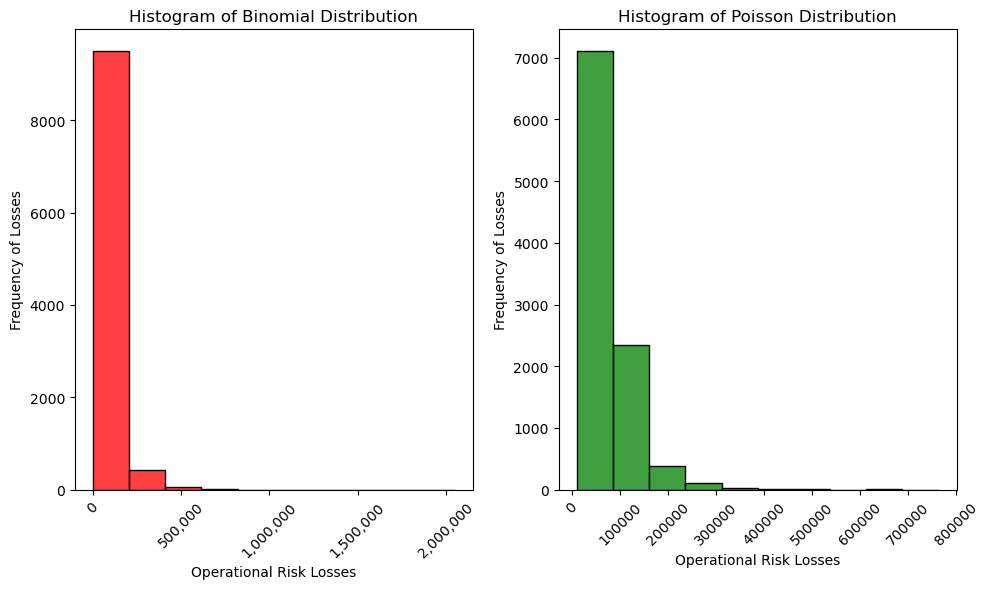

In [188]:
import matplotlib.ticker as ticker
plt.figure(figsize = (10, 6))
def format_ticks(x, pos):
    return '{:,.0f}'.format(x)
plt.subplot(1, 2, 1)
sns.histplot(OpRisk['Binom_Monthly_Loss'], bins = 10, color = 'red', edgecolor = 'black')
plt.xlabel('Operational Risk Losses')
plt.xticks(rotation = 45)
plt.ylabel('Frequency of Losses')
plt.title('Histogram of Binomial Distribution')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.subplot(1, 2, 2)
sns.histplot(OpRisk['Poisson_Monthly_Loss'], bins = 10, color = 'green', edgecolor = 'black')
plt.xlabel('Operational Risk Losses')
plt.xticks(rotation = 45)
plt.ylabel('Frequency of Losses')
plt.title('Histogram of Poisson Distribution')
plt.tight_layout()  
plt.show()

Text(0.5, 1.0, 'Boxplot Operational Loss using Binomial Distribution')

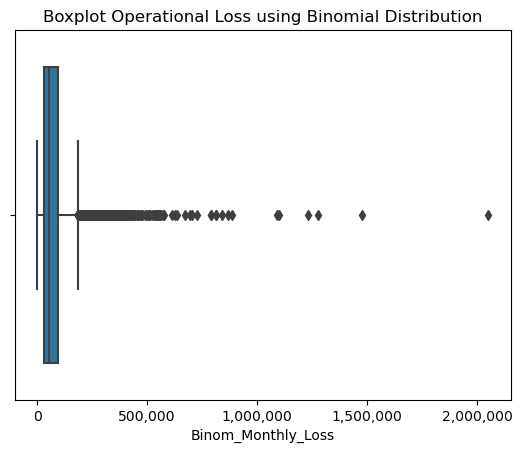

In [189]:
def format_ticks(x, pos):
    return '{:,.0f}'.format(x)
sns.boxplot(x = 'Binom_Monthly_Loss', data = OpRisk, showfliers = True, showbox = True)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
plt.title('Boxplot Operational Loss using Binomial Distribution')

Text(0.5, 1.0, 'Boxplot Operational Loss using Poisson Distribution')

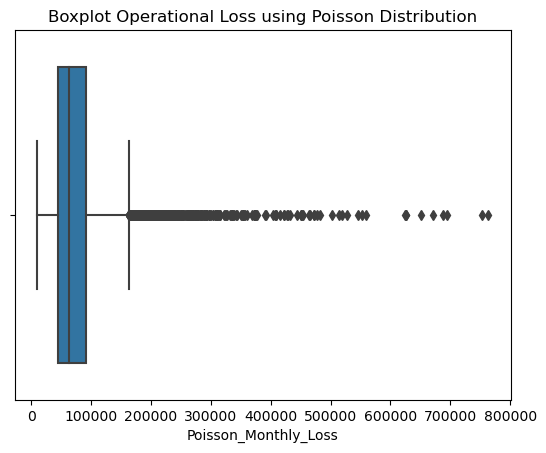

In [190]:
sns.boxplot(x = 'Poisson_Monthly_Loss', data = OpRisk, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss using Poisson Distribution')

# Observation
The histograms of distributions are skewed to the left and show concentration of losses of relatively small amounts, but also tell about presence of esential amounts of outliers with big amounts above 200000.

In [191]:
# Calculation of Operational Value at Risk using Poisson and Inverse Lognormal Distributions
OpRisk_Monthly_Poisson_VaR_95 = OpRisk['Poisson_Monthly_Loss'].quantile(0.95)
print('Monthly Operational Risk Value at Risk with 95% confidence = ', OpRisk_Monthly_Poisson_VaR_95)
OpRisk_Max_Poisson_Loss = OpRisk['Poisson_Monthly_Loss'].max()
print('Maximul Operational Risk Loss = ', OpRisk_Max_Poisson_Loss)
OpRisk_Basel_Poisson_VaR_99 = OpRisk['Poisson_Monthly_Loss'].quantile(0.99)
print('Monthly Operational Risk Value at Risk as per Basel 99% confidence requirements = ', OpRisk_Basel_Poisson_VaR_99)
OpRisk_Monthly_Poisson_EL = OpRisk['Poisson_Monthly_Loss'].mean()
print('Monthly Operational Risk Expected Loss (Mean)', OpRisk_Monthly_Poisson_EL)
OpRisk_Monthly_Poisson_Median = OpRisk['Poisson_Monthly_Loss'].median()
print('Monthly Operational Risk Expected Loss (Median)', OpRisk_Monthly_Poisson_Median)
OpRisk_Monthly_Poisson_UL = OpRisk_Basel_Poisson_VaR_99 - OpRisk_Monthly_Poisson_EL
print('Monthly Operational Risk Unexpected Loss', OpRisk_Monthly_Poisson_UL)
OpRisk_Annual_Poisson_VaR_95 = OpRisk_Monthly_Poisson_VaR_95 * np.sqrt(12)
print('Annual Operational Risk Value at Risk with 95% confidence = ', OpRisk_Annual_Poisson_VaR_95)

Monthly Operational Risk Value at Risk with 95% confidence =  166997.0223834223
Maximul Operational Risk Loss =  763418.0693216583
Monthly Operational Risk Value at Risk as per Basel 99% confidence requirements =  276556.29697360954
Monthly Operational Risk Expected Loss (Mean) 76317.96736674529
Monthly Operational Risk Expected Loss (Median) 63245.78613570266
Monthly Operational Risk Unexpected Loss 200238.32960686425
Annual Operational Risk Value at Risk with 95% confidence =  578494.6549616089


In [192]:
# Comparison of results of different approaches (Inverse Binomial and Poisson Distributions) for Operational Risk Value at Risk Calculations

print('Operational Risk Value at Risk Calculation using Inverse Binomial Distribution :')
print('Monthly Operational Risk Value at Risk with 95% confidence = ', f"{OpRisk_Monthly_Binom_VaR_95: .2f}")
print('Maximum Operational Risk Loss = ', f"{OpRisk_Max_Binom_Loss: .2f}")
print('Monthly Operational Risk Value at Risk as per Basel with 99% confidence requirements = ', f"{OpRisk_Basel_Binom_VaR_99: .2f}")
print('Monthly Operational Risk Expected Loss (Mean)', f"{OpRisk_Monthly_Binom_EL: .2f}")
print('Monthly Operational Risk Expected Loss (Median)', f"{OpRisk_Monthly_Binom_Median: .2f}")
print('Monthly Operational Risk Unexpected Loss', f"{OpRisk_Monthly_Binom_UL: .2f}")
print('Annual Operational Risk Value at Risk with 95% confidence = ', f"{OpRisk_Annual_Binom_VaR_95: .2f}")
print('')
print('')
print('Operational Risk Value at Risk Calculation using Poisson Distribution :')
print('Monthly Operational Risk Value at Risk with 95% confidence = ', f"{OpRisk_Monthly_Poisson_VaR_95: .2f}")
print('Maximum Operational Risk Loss = ', f"{OpRisk_Max_Poisson_Loss: .2f}")
print('Monthly Operational Risk Value at Risk as per Basel with 99% confidence requirements = ', f"{OpRisk_Basel_Poisson_VaR_99: .2f}")
print('Monthly Operational Risk Expected Loss (Mean)', f"{OpRisk_Monthly_Poisson_EL: .2f}")
print('Monthly Operational Risk Expected Loss (Median)', f"{OpRisk_Monthly_Poisson_Median: .2f}")
print('Monthly Operational Risk Unexpected Loss', f"{OpRisk_Monthly_Poisson_UL: .2f}")
print('Annual Operational Risk Value at Risk with 95% confidence = ', f"{OpRisk_Annual_Poisson_VaR_95: .2f}")

Operational Risk Value at Risk Calculation using Inverse Binomial Distribution :
Monthly Operational Risk Value at Risk with 95% confidence =   206914.24
Maximum Operational Risk Loss =   2049925.56
Monthly Operational Risk Value at Risk as per Basel with 99% confidence requirements =   377533.47
Monthly Operational Risk Expected Loss (Mean)  75757.53
Monthly Operational Risk Expected Loss (Median)  54304.77
Monthly Operational Risk Unexpected Loss  301775.94
Annual Operational Risk Value at Risk with 95% confidence =   716771.94


Operational Risk Value at Risk Calculation using Poisson Distribution :
Monthly Operational Risk Value at Risk with 95% confidence =   166997.02
Maximum Operational Risk Loss =   763418.07
Monthly Operational Risk Value at Risk as per Basel with 99% confidence requirements =   276556.30
Monthly Operational Risk Expected Loss (Mean)  76317.97
Monthly Operational Risk Expected Loss (Median)  63245.79
Monthly Operational Risk Unexpected Loss  200238.33
Annual O

# Conclusion:
Computation of Operational Risk Value at Risk given 2 different approaches for generating operational risk events like Inverse Binomial Distribution and Poisson Distribution and Inverse Lognormal Distribution for generating operational risk losses show significantly different results.
For example, Monthly Value at Risk (VaR) with 95% confidence using Binomial Distribution is 206 914.24 and the same using Poisson Distribution is 166 997.02.
Monthly VaR with 99% confidence as per Basel Requirements for Binomial Distribution is 377 533.47 and Poisson is 276 556.30.
Monthly Expected Loss or Mathematical Expectations (Mean) for Binomial is 75 757.53 and Poisson is 76 317.97, which show relatevly similar values, the same using Median values are for Binomial 54 304.77 and for Poisson 63 245.79. As our distributions are skewed to the left and show many outliers it is recommended to take Median values for Expected Loss instead of Mean values.
But Monthly Unexpected Loss for Binomial is 301 775.94 and Poisson is 200 238.33 that has essentially other amounts.
Comparison of Annual VaR with 95% confidence also show distinct resuls like 716 771.94 for Binomial and 578 494.65 for Poisson distribution.